In [2]:
from sd15 import TwoUnetsPipeline
from sdxl import TwoUnetsXLPipeline
import torch
import diffusers

In [3]:
uncon_unet = "runwayml/stable-diffusion-v1-5"
cond_unet = "Lykon/Dreamshaper"

uncond_unet = diffusers.UNet2DConditionModel.from_pretrained(uncon_unet, subfolder="unet").to("cuda",torch.float16)
pipe = TwoUnetsPipeline.from_pretrained(cond_unet, uncond_unet=uncond_unet).to("cuda",torch.float16)

safety_checker/model.safetensors not found
Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]/opt/sd/lib/python3.9/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
Loading pipeline components...: 100%|██████████| 7/7 [00:04<00:00,  1.62it/s]


In [4]:
pipe.scheduler = diffusers.EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.safety_checker = None

In [35]:
prompt = "HD photo of a steampunk warrior"
negative_prompt = "low quality, low resolutions"

torch.manual_seed(6)
img = pipe(prompt,
            negative_prompt = negative_prompt,
            swap_step=1.0,
            guidance_rescale=0.7,
            height=640,
            width=640,
            guidance_scale=5.0,
            num_inference_steps=20,
            ).images

 10%|█         | 2/20 [00:00<00:01, 14.28it/s]

100%|██████████| 20/20 [00:01<00:00, 15.35it/s]


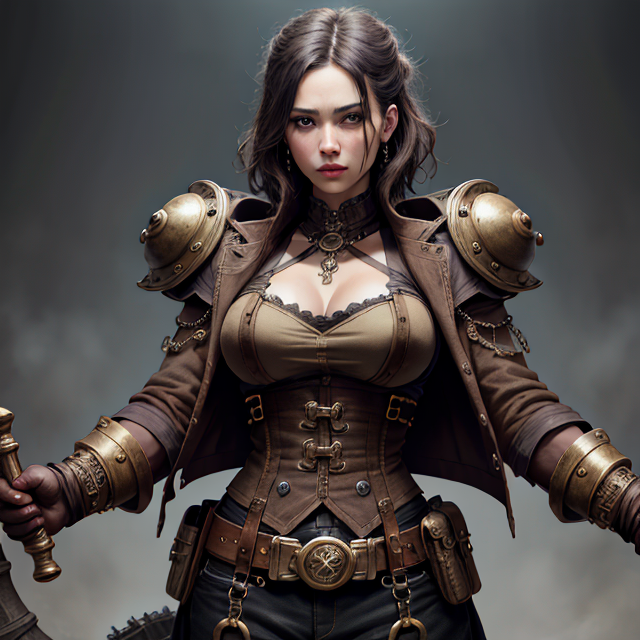

In [36]:
img[0]

In [33]:
prompt = "HD photo of a steampunk warrior"
negative_prompt = "low quality, low resolutions"

torch.manual_seed(6)
img = pipe(prompt,
            negative_prompt = negative_prompt,
            swap_step=0.0,
            height=640,
            guidance_rescale=0.7,
            width=640,
            guidance_scale=7.0,
            num_inference_steps=20,
            ).images

 15%|█▌        | 3/20 [00:00<00:00, 20.58it/s]

100%|██████████| 20/20 [00:00<00:00, 21.64it/s]


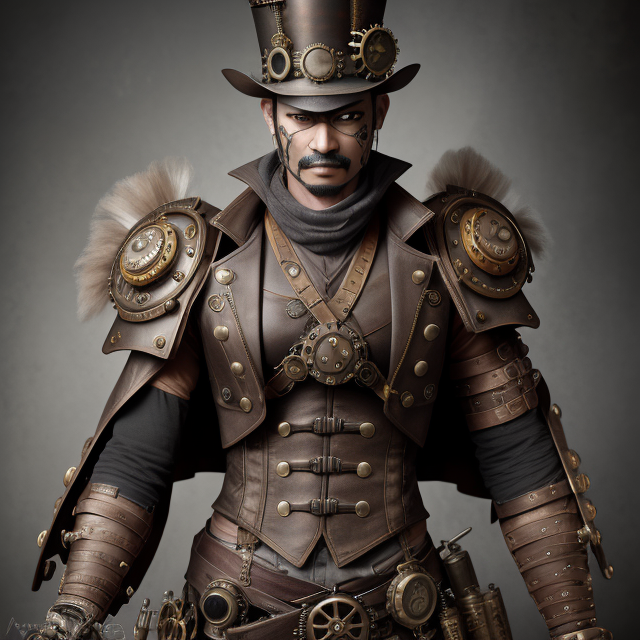

In [34]:
img[0]